## Weather dataset


In [1]:
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta

Here I am importing the weather dataset which is in a netCDF format.<br>
The dataset has been clean and verified.<br>
I have done some exploring and I know that what I need to extact is temperatures and time.<br>
The time is minutes since Jan the 1st of 1931.<br>
The file is only for Edinburgn weather station:<br>
- ID:            031600-99999
- Location: Lat  55.950   long -3.373   elevetion 41.1
- Starting date: 1973-01-01
- End date:      2018-01-02. 

In [2]:
file_path = 'data/hadisd.2.0.2.2017f_19310101-20171231_031600-99999.nc'
data = Dataset(file_path, mode='r')

print(data.variables.keys())

odict_keys(['longitude', 'latitude', 'elevation', 'station_id', 'temperatures', 'dewpoints', 'slp', 'windspeeds', 'winddirs', 'total_cloud_cover', 'low_cloud_cover', 'mid_cloud_cover', 'high_cloud_cover', 'cloud_base', 'precip1_depth', 'precip1_period', 'wind_gust', 'past_sigwx1', 'time', 'input_station_id', 'quality_control_flags', 'flagged_value', 'reporting_stats'])


In [3]:
data.variables['temperatures']

<class 'netCDF4._netCDF4.Variable'>
float64 temperatures(time)
    _FillValue: -1e+30
    long_name: Dry bulb air temperature at screen height (~2m)
    units: degree_Celsius
    missing_value: -1e+30
    flagged_value: -2e+30
    valid_min: -17.0
    valid_max: 31.0
    standard_name: surface_temperature
    coordinates: latitude longitude elevation
    cell_methods: latitude: longitude: time: point (nearest to reporting hour)
unlimited dimensions: 
current shape = (389828,)
filling on

In [4]:
data.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    least_significant_digit: 0
    long_name: time_of_measurement
    units: hours since 1931-01-01 00:00
    valid_min: 0.0
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (389828,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
data.variables['input_station_id']

<class 'netCDF4._netCDF4.Variable'>
|S1 input_station_id(time, long_character_length)
    long_name: Primary source for timestep (may be multiple sources for composite stations). USAF-WBAN from ISD source
    missing_value: n
unlimited dimensions: 
current shape = (389828, 12)
filling on, default _FillValue of   used

In [6]:
temp = data.variables['temperatures']
time = data.variables['time']
station = data.variables['input_station_id']

In [7]:
temp_array = temp[:]
time_array = time[:]

In [8]:
temp_array.shape

(389828,)

In [9]:
time_array.shape

(389828,)

In [10]:
print(temp_array)

[10.0 10.0 10.0 ... 4.0 5.0 4.0]


In [11]:
print(time_array)

[368184. 368185. 368186. ... 762645. 762646. 762647.]


In [12]:
df_temp = pd.DataFrame(temp_array.data, columns=['temperature'])
df_time = pd.DataFrame(time_array.data, columns=['time'])

In [13]:
df_time.head(5)

,time
0,368184.0
1,368185.0
2,368186.0
3,368187.0
4,368188.0


In [14]:
df_temp.head(5)

,temperature
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0


### Concatinate both datasets into one

In [15]:
my_data = pd.concat([df_time, df_temp], axis=1, sort=False)

In [16]:
my_data.describe()

,time,temperature
count,389828.000000,3.898280e+05
mean,565512.546315,-1.427809e+28
std,113981.559698,1.651204e+29
min,368184.000000,-2.000000e+30
25%,466881.750000,5.000000e+00
50%,564579.500000,9.000000e+00
75%,665003.250000,1.300000e+01
max,762647.000000,3.100000e+01


In [17]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389828 entries, 0 to 389827
Data columns (total 2 columns):
time           389828 non-null float64
temperature    389828 non-null float64
dtypes: float64(2)
memory usage: 5.9 MB


In [18]:
my_data.head(5)

,time,temperature
0,368184.0,10.0
1,368185.0,10.0
2,368186.0,10.0
3,368187.0,10.0
4,368188.0,10.0


In [19]:
my_data['temperature'].tail(24).plot.line()

### Sanity check
Checking if the starring date of dataset = derive starting date.<br>
The starting date for this dataset is January the 1st of 1973, and the hours from starting point date is 1931, 1, 1, as stated in the documention.

In [20]:
to_add_hours = pd.to_timedelta(368184.0, unit='h')

In [21]:
start_date = datetime(1931, 1, 1)

current =  start_date + to_add_hours

In [22]:
current
#this is the initial date

datetime.datetime(1973, 1, 1, 0, 0)

### The derive starting date matches.
Now create a new column with the derive date.<br>
starting date + hourse since


In [23]:
my_data['Hourly'] =  start_date + pd.to_timedelta(my_data['time'], unit='h')

In [24]:
my_data.head(5)

,time,temperature,Hourly
0,368184.0,10.0,1973-01-01 00:00:00
1,368185.0,10.0,1973-01-01 01:00:00
2,368186.0,10.0,1973-01-01 02:00:00
3,368187.0,10.0,1973-01-01 03:00:00
4,368188.0,10.0,1973-01-01 04:00:00


In [25]:
my_data.tail(5)

,time,temperature,Hourly
389823,762643.0,5.0,2017-12-31 19:00:00
389824,762644.0,5.0,2017-12-31 20:00:00
389825,762645.0,4.0,2017-12-31 21:00:00
389826,762646.0,5.0,2017-12-31 22:00:00
389827,762647.0,4.0,2017-12-31 23:00:00


#### Filtering only the dates needed

In [26]:
temp_data = my_data[my_data['Hourly'] > '2016-10-30']

#### Quick sanity check, can see that daily temperatures ranges are normal, around 10 degress

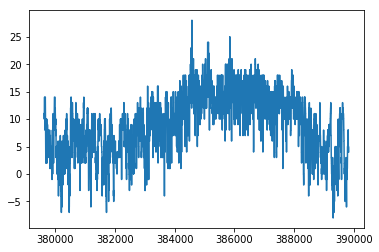

In [27]:
temp_data['temperature'].plot.line()

#### Saving dataset to csv file

In [28]:
temp_data.to_csv('Data/temp_data.csv')

In [29]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10208 entries, 379620 to 389827
Data columns (total 3 columns):
time           10208 non-null float64
temperature    10208 non-null float64
Hourly         10208 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 319.0 KB


#### Details:
Version used: HadISD.2.0.2.2017f
Dunn, R. J. H., et al. (2016), Expanding HadISD: quality-controlled, sub-daily station data from 1931, Geoscientific Instrumentation, Methods and Data Systems, 5, 473-491

Dunn, R. J. H., et al. (2014), Pairwise homogeneity assessment of HadISD, Climate of the Past, 10, 1501-1522

Dunn, R. J. H., et al. (2012), HadISD: A Quality Controlled global synoptic report database for selected variables at long-term stations from 1973-2011, Climate of the Past, 8, 1649-1679

Smith, A., et al. (2011): The Integrated Surface Database: Recent Developments and Partnerships. Bulletin of the American Meteorological Society, 92, 704-708